In [12]:
import sys
import os
import pandas as pd
import numpy as np

sys.path.append('/home/hxcai/cell_type_specific_CRE/MPRA_exp')
import utils
os.chdir('../../data/AgarwalMPRA')

In [13]:
table_s3 = pd.ExcelFile('media-3.xlsx')
print(table_s3.sheet_names)
table_s4 = pd.ExcelFile('media-4.xlsx')
print(table_s4.sheet_names)

['HepG2 large-scale', 'K562 large-scale', 'WTC11 large-scale']
['HepG2_replicate_level', 'HepG2_summary_data', 'HepG2_forward_reverse', 'K562_replicate_level', 'K562_summary_data', 'K562_forward_reverse', 'WTC11_replicate_level', 'WTC11_summary_data', 'WTC11_forward_reverse']


In [14]:
df_large_scale = pd.read_excel('media-3.xlsx', header=3, sheet_name='HepG2 large-scale')
print(df_large_scale.shape)

df_summary_data = pd.read_excel('media-4.xlsx', sheet_name='HepG2_summary_data')
print(df_summary_data.shape)

df_table = pd.merge(df_large_scale, df_summary_data, on='name', how='inner')
print(df_table.shape)

df_table.to_csv('HepG2_table.csv', index=False)

(164307, 11)
(139885, 5)
(139877, 15)


In [23]:
df_table_s = df_table[['230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)', 'chr.hg38', 'mean']]
df_table_s = df_table_s.rename(columns={'230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)': 'seq', 'chr.hg38': 'chr', 'mean': 'exp'})
df_table_s.to_csv('HepG2_table_s.csv', index=False)

In [4]:
# 初始化用于存储处理结果的字典
result_dict = {}

# 遍历DataFrame，进行处理
for index, row in df_table.iterrows():
    # 检查name是否以'_reverse'结尾
    base_name = row['name'].replace('_Reversed:', '')
    
    # 如果base_name不在result_dict中，则初始化
    if base_name not in result_dict:
        result_dict[base_name] = {'exp_sum': 0, 'count': 0, 'seq': 0}
    
    # 累加exp值，增加计数
    result_dict[base_name]['exp_sum'] += row['mean']
    result_dict[base_name]['count'] += 1

    if base_name == row['name']:
        result_dict[base_name]['seq'] = row["230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)"]
        result_dict[base_name]['chr'] = row["chr.hg38"]

# 将累积结果转换为列表，准备转换回DataFrame
result_list = []
for name, values in result_dict.items():
    if values['count'] == 2:
        values['exp'] = values['exp_sum'] / 2
        result_list.append({'seq': values['seq'], 'exp': values['exp'], 'chr': values['chr']})

# 将列表转换回DataFrame
result_df_table = pd.DataFrame(result_list)

print(result_df_table.shape)

result_df_table.to_csv('HepG2_table_rc.csv', index=False)

(61810, 3)


In [24]:
df_large_scale = pd.read_excel('media-3.xlsx', header=1, sheet_name='K562 large-scale')
print(df_large_scale.shape)

df_summary_data = pd.read_excel('media-4.xlsx', sheet_name='K562_summary_data')
print(df_summary_data.shape)

df_table = pd.merge(df_large_scale, df_summary_data, on='name', how='inner')
print(df_table.shape)

df_table.to_csv('K562_table.csv', index=False)

(243780, 7)
(226254, 5)
(226254, 11)


In [25]:
df_table_s = df_table[['230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)', 'chr.hg38', 'mean']]
df_table_s = df_table_s.rename(columns={'230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)': 'seq', 'chr.hg38': 'chr', 'mean': 'exp'})
df_table_s.to_csv('K562_table_s.csv', index=False)

In [4]:
df_table

,name,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor),replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean
0,peak1_Reversed:,putative enhancer,chr1,115631.0,115831.0,-,AGGACCGGATCAACTTCTTGTGAGGGTGGCTTATCTGAAATGCTGC...,0.138,-0.044,0.025,0.040
1,peak10,putative enhancer,chr1,634309.0,634509.0,+,AGGACCGGATCAACTTGTCGCCTTAATCCAAGCCTACGTTTTTACA...,-0.588,-0.785,-0.098,-0.490
2,peak10_Reversed:,putative enhancer,chr1,634309.0,634509.0,-,AGGACCGGATCAACTAGTATGAGGAGGGTTGTGGAGTGGAAGTGAA...,-0.317,-0.059,-0.017,-0.131
3,peak1000,putative enhancer,chr1,16514496.0,16514696.0,+,AGGACCGGATCAACTCATCTACATAGAAGTCGCCCTGTCCGTGATG...,0.803,0.511,0.569,0.628
4,peak1000_Reversed:,putative enhancer,chr1,16514496.0,16514696.0,-,AGGACCGGATCAACTTTGCTCCTTAACACAGGCTAAGGACCAGCTT...,1.078,1.382,1.330,1.263
...,...,...,...,...,...,...,...,...,...,...,...
226249,RBM38_9948_Reversed:,Gurkan-selected,chr20,58380807.0,58381007.0,-,AGGACCGGATCAACTAAGAGAAAGAGAGAGAGTCCCAGATGGAGGC...,-0.809,-0.638,-0.874,-0.774
226250,RBM38_9951,Gurkan-selected,chr20,58381407.0,58381607.0,+,AGGACCGGATCAACTACAGTGCGGCTCAGGGTGGGGACTTGGGATC...,-0.346,-0.595,-0.681,-0.541
226251,RBM38_9951_Reversed:,Gurkan-selected,chr20,58381407.0,58381607.0,-,AGGACCGGATCAACTTAATACAGGATGTGTGACTCTTAGTGTGTAA...,0.073,0.753,-0.412,0.138
226252,RBM38_9952,Gurkan-selected,chr20,58381607.0,58381807.0,+,AGGACCGGATCAACTGTTTGTTCTCACACTGCTAATAAAGACATAC...,-0.441,-1.235,-0.819,-0.832


In [5]:
# 初始化用于存储处理结果的字典
result_dict = {}

# 遍历DataFrame，进行处理
for index, row in df_table.iterrows():
    # 检查name是否以'_reverse'结尾
    base_name = row['name'].replace('_Reversed:', '')
    
    # 如果base_name不在result_dict中，则初始化
    if base_name not in result_dict:
        result_dict[base_name] = {'exp_sum': 0, 'count': 0, 'seq': 0}
    
    # 累加exp值，增加计数
    result_dict[base_name]['exp_sum'] += row['mean']
    result_dict[base_name]['count'] += 1

    if base_name == row['name']:
        result_dict[base_name]['seq'] = row["230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)"]
        result_dict[base_name]['chr'] = row["chr.hg38"]

# 将累积结果转换为列表，准备转换回DataFrame
result_list = []
for name, values in result_dict.items():
    if values['count'] == 2:
        values['exp'] = values['exp_sum'] / 2
        result_list.append({'seq': values['seq'], 'exp': values['exp'], 'chr': values['chr']})

# 将列表转换回DataFrame
result_df_table = pd.DataFrame(result_list)

print(result_df_table.shape)

result_df_table.to_csv('K562_table_rc.csv', index=False)

(111526, 3)


In [26]:
df_large_scale = pd.read_excel('media-3.xlsx', header=0, sheet_name='WTC11 large-scale')
print(df_large_scale.shape)

df_summary_data = pd.read_excel('media-4.xlsx', sheet_name='WTC11_summary_data')
print(df_summary_data.shape)

df_table = pd.merge(df_large_scale, df_summary_data, on='name', how='inner')
print(df_table.shape)

df_table.to_csv('WTC11_table.csv', index=False)

(75542, 7)
(56092, 5)
(55989, 11)


In [27]:
df_table

,name,category,chr.hg38,start.hg38,stop.hg38,str.hg38,230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor),replicate 1 [log2(rna/dna)],replicate 2 [log2(rna/dna)],replicate 3 [log2(rna/dna)],mean
0,seq1000_F,putative enhancer,1,19461350.0,19461550.0,+,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,-0.693,-1.326,-1.208,-1.076
1,seq1000_R,putative enhancer,1,19461350.0,19461550.0,-,AGGACCGGATCAACTAGCAGGAAGCATGCGTGGAAGCCAGCTCATG...,-1.027,-1.107,-2.203,-1.446
2,seq10002_F,putative enhancer,10,88965538.0,88965738.0,+,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,-0.449,NaN,NaN,-0.449
3,seq10002_R,putative enhancer,10,88965538.0,88965738.0,-,AGGACCGGATCAACTAGCAATCCCTGGGAAAATCTGTGCTTTGCAG...,-0.829,-1.932,-1.156,-1.306
4,seq10004_F,putative enhancer,10,89029900.0,89030100.0,+,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,0.855,NaN,0.006,0.430
...,...,...,...,...,...,...,...,...,...,...,...
55984,seq77431_shuffled_0,"negative, shuffled",NaN,NaN,NaN,NaN,AGGACCGGATCAACTCCAGCCATCCACCCCACTGGCACTGTACAAG...,-1.825,-3.046,-0.881,-1.917
55985,seq78540_shuffled_0,"negative, shuffled",NaN,NaN,NaN,NaN,AGGACCGGATCAACTTGGCACAGATGGCTCAGACACCGGTTGCCAT...,-1.561,-1.197,-2.152,-1.637
55986,seq79319_shuffled_0,"negative, shuffled",NaN,NaN,NaN,NaN,AGGACCGGATCAACTCTTTCTTTCTTGTGGTGCCACCAGAACCAAC...,-0.769,-0.176,-0.383,-0.443
55987,seq8409_shuffled_0,"negative, shuffled",NaN,NaN,NaN,NaN,AGGACCGGATCAACTGGGTGGAAATTGGCATGGTTTGCACGATGTG...,-1.704,NaN,-1.788,-1.746


In [28]:
df_table_s = df_table[['230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)', 'chr.hg38', 'mean']]
df_table_s = df_table_s.rename(columns={'230nt sequence (15nt 5\' adaptor - 200nt element - 15nt 3\' adaptor)': 'seq', 'chr.hg38': 'chr', 'mean': 'exp'})
df_table_s['chr'] = 'chr' + df_table_s['chr'].astype(str)
df_table_s.to_csv('WTC11_table_s.csv', index=False)

In [10]:
# 初始化用于存储处理结果的字典
result_dict = {}

# 遍历DataFrame，进行处理
for index, row in df_table.iterrows():
    # 检查name是否以'_reverse'结尾
    base_name = row['name'].replace('_R', '_F')
    
    # 如果base_name不在result_dict中，则初始化
    if base_name not in result_dict:
        result_dict[base_name] = {'exp_sum': 0, 'count': 0, 'seq': 0}
    
    # 累加exp值，增加计数
    result_dict[base_name]['exp_sum'] += row['mean']
    result_dict[base_name]['count'] += 1

    if base_name == row['name']:
        result_dict[base_name]['seq'] = row["230nt sequence (15nt 5' adaptor - 200nt element - 15nt 3' adaptor)"]
        result_dict[base_name]['chr'] = row["chr.hg38"]

# 将累积结果转换为列表，准备转换回DataFrame
result_list = []
for name, values in result_dict.items():
    if values['count'] == 2:
        values['exp'] = values['exp_sum'] / 2
        result_list.append({'seq': values['seq'], 'exp': values['exp'], 'chr': 'chr' + str(values['chr'])})

# 将列表转换回DataFrame
result_df_table = pd.DataFrame(result_list)

print(result_df_table.shape)
result_df_table.to_csv('WTC11_table_rc.csv', index=False)

(23064, 3)


In [3]:
count = [0,0,0]
indice_list = []
for index, row in df.iterrows():
    try:
        int(row['OL'])
    except:
        count[0] += 1
        # print(row['OL'])
        if (row['OL'] is np.nan):
            count[1] += 1
    if len(row['nt_sequence']) != 200:
        count[2] += 1
print(count)

[65321, 14086, 34381]


In [4]:
df = df[df['nt_sequence'].str.len() == 200]
len(df)

763683

In [5]:
df[['nt_sequence', 'chr', 'HepG2_mean', 'K562_mean', 'SKNSH_mean']].to_csv('filtered_MPRA_data.csv', index=False)

<Axes: xlabel='HepG2_mean', ylabel='Count'>

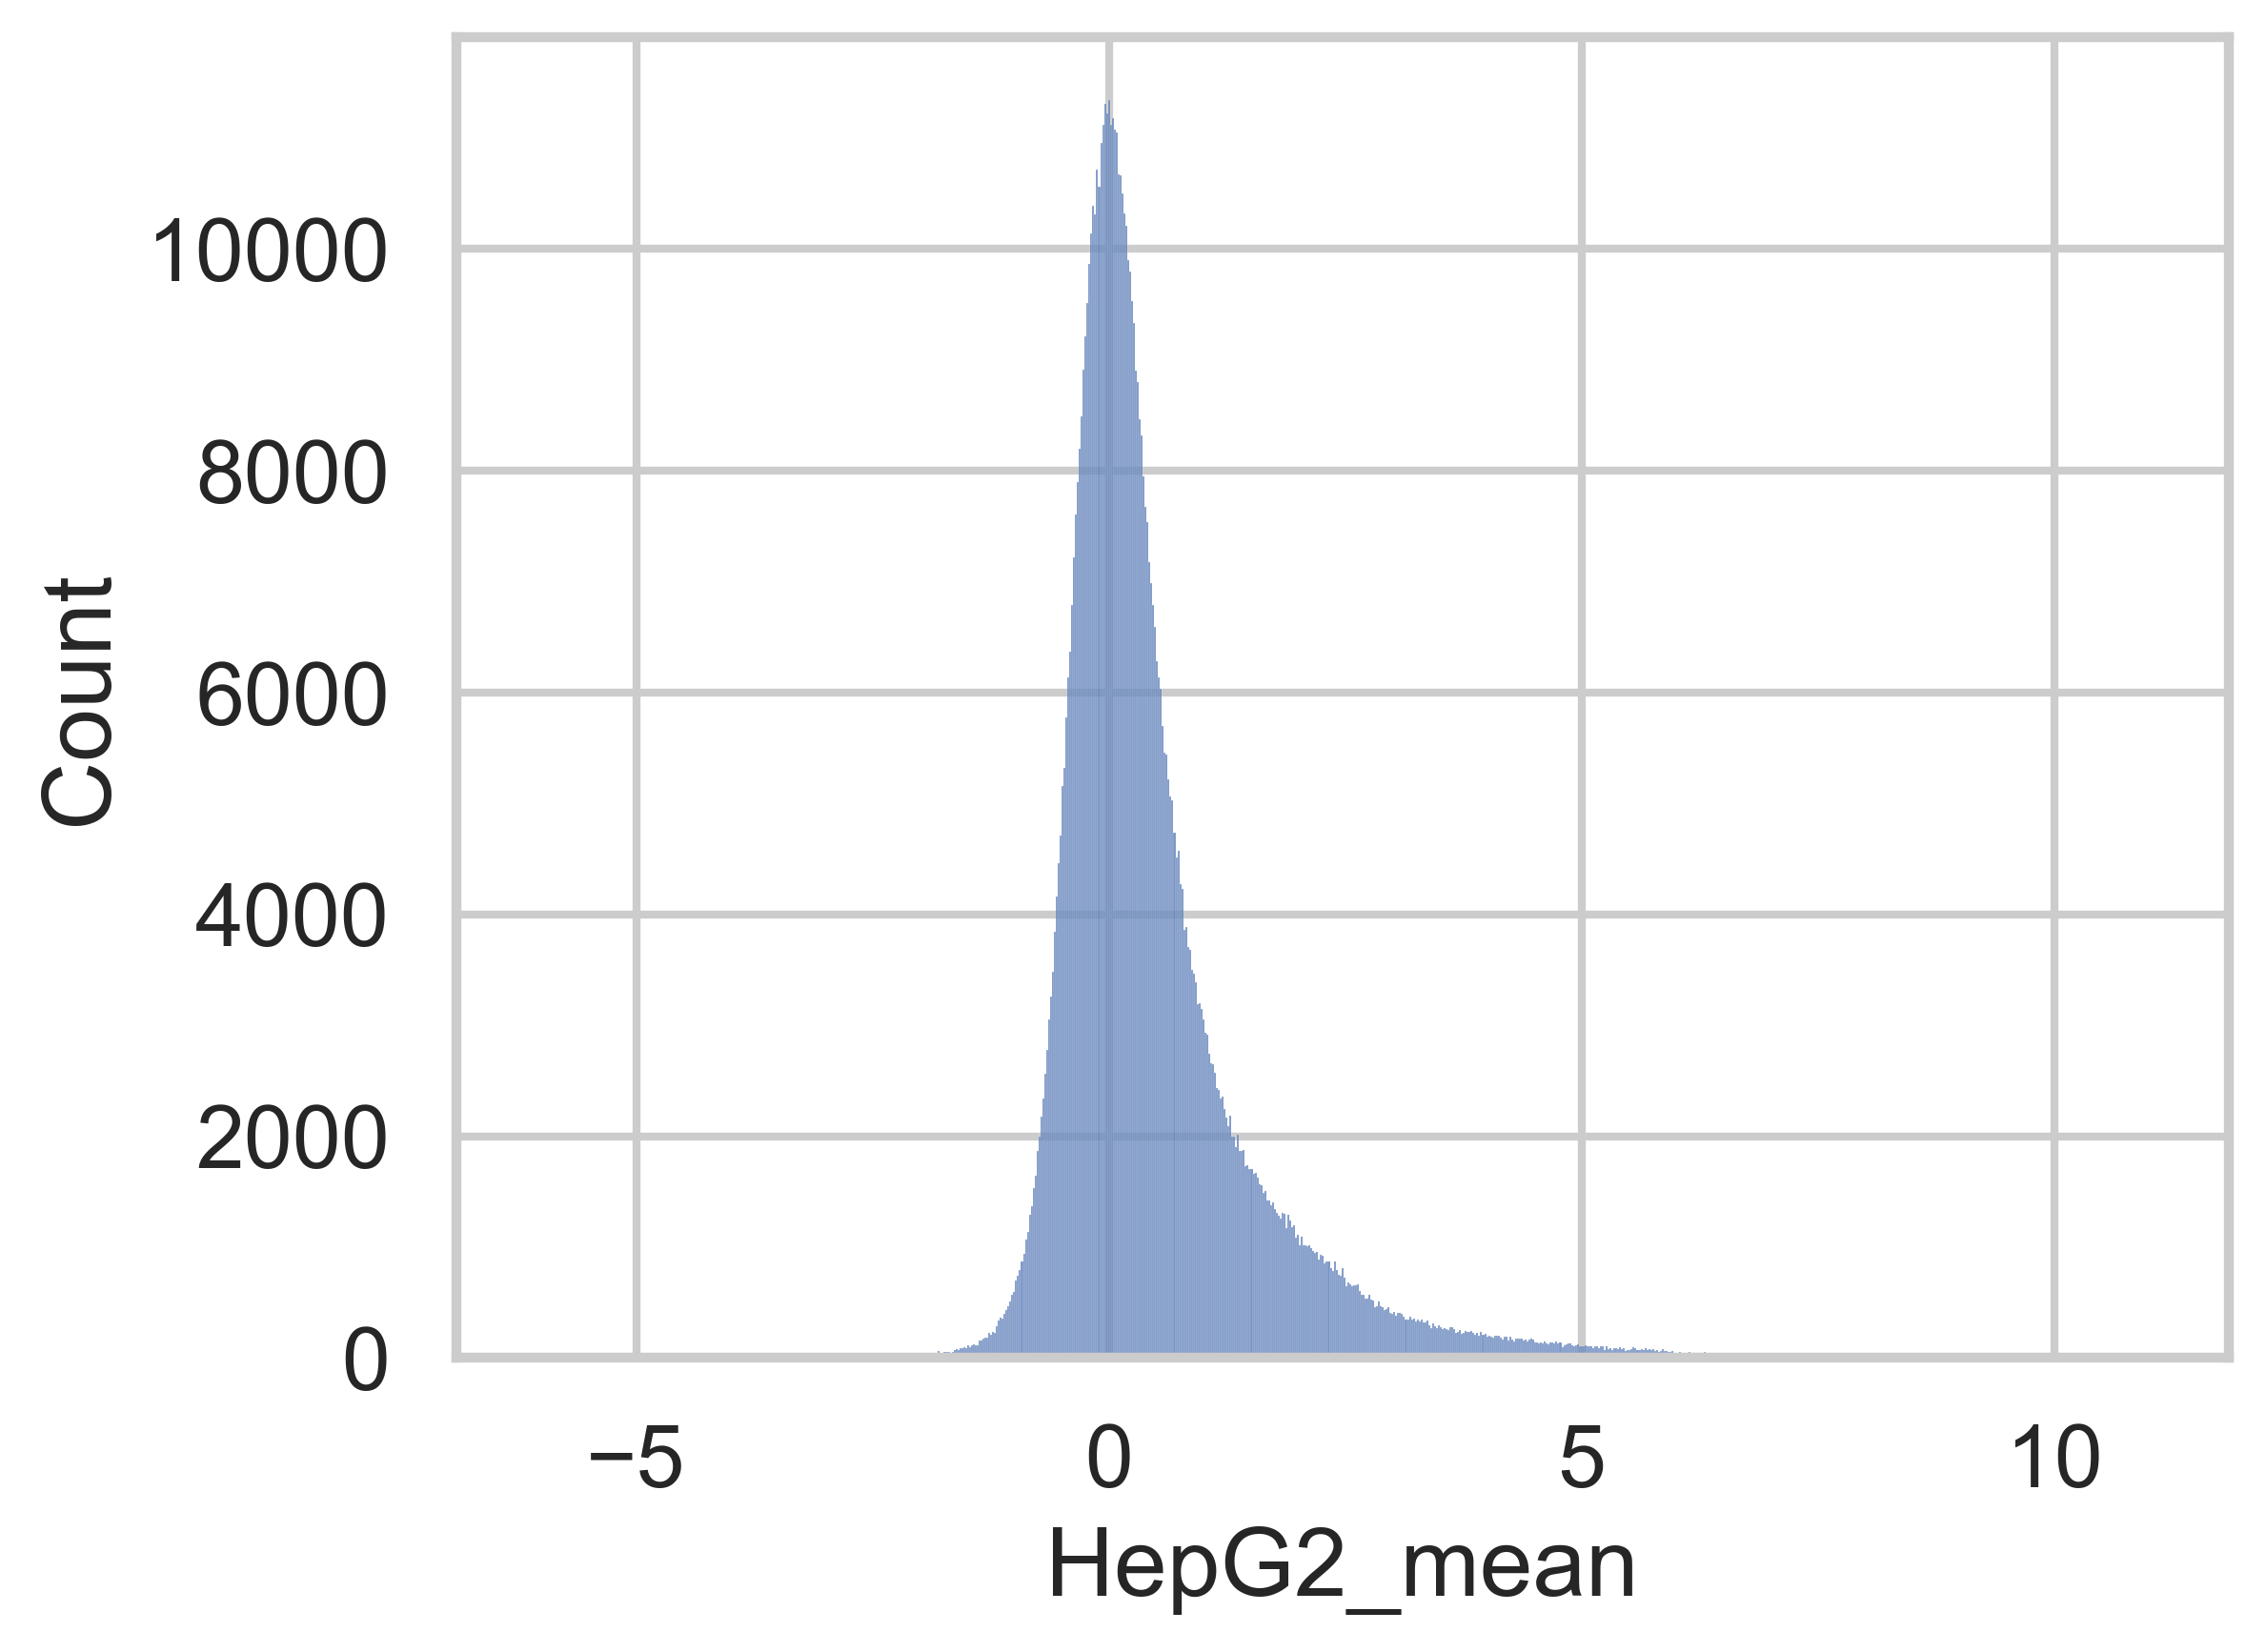

In [6]:
sns.histplot(df['HepG2_mean'])

In [1]:
import pandas as pd
import numpy as np

table_dir = './HepG2_table_s.csv'
table = pd.read_csv(table_dir)
seqs = table['seq'].to_numpy()
labels = table['exp'].to_numpy()
np.save('HepG2_seqs.npy', seqs)
np.save('HepG2_labels.npy', labels)

table_dir = './K562_table_s.csv'
table = pd.read_csv(table_dir)
seqs = table['seq'].to_numpy()
labels = table['exp'].to_numpy()
np.save('K562_seqs.npy', seqs)
np.save('K562_labels.npy', labels)

table_dir = './WTC11_table_s.csv'
table = pd.read_csv(table_dir)
seqs = table['seq'].to_numpy()
labels = table['exp'].to_numpy()
np.save('WTC11_seqs.npy', seqs)
np.save('WTC11_labels.npy', labels)